In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [5]:
image_path ="../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
# Reads the image as BGR. 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Converting the image from BGR to RGB

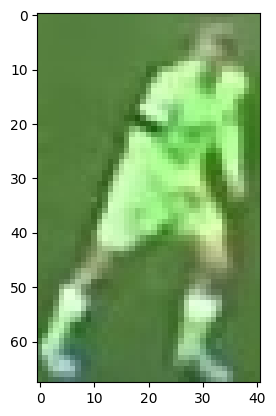

In [6]:
plt.imshow(image)
plt.show()

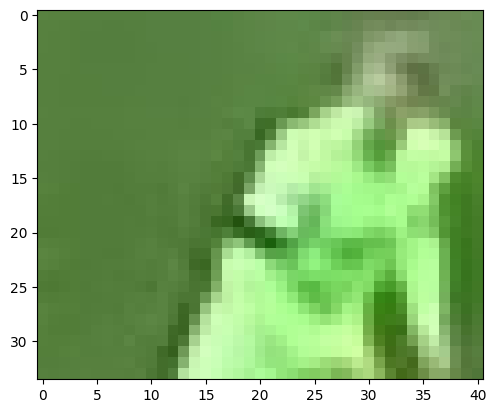

In [7]:
# Top half of the image for shirt colour
# image.shape[0] = height of the image
top_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_image)
plt.show()

In [12]:
# we have to cluster the image into two colours --> the background and the jersey
# Then get average of the jersey colour

# Reshape image to 2d array
image_2d = top_image.reshape(-1, 3)

# k means clustering
# random state is for reproducability of results.
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get labels of clusters
labels = kmeans.labels_

# reshape labels into image shape
clustered_image = labels.reshape(top_image.shape[0], top_image.shape[1])

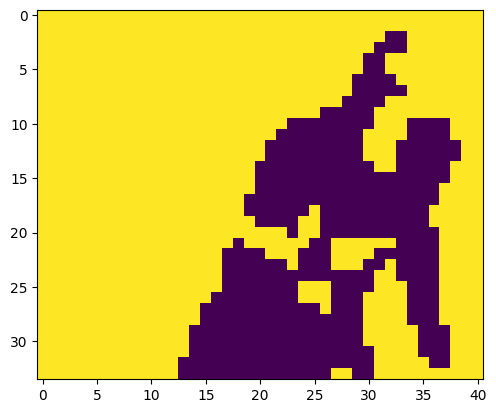

In [13]:
plt.imshow(clustered_image)
plt.show()

As observed the image is divided into 2 different colours
Now we can get the average colour of the jersey.

In [14]:
corner_clusters = [clustered_image[0,0],
                   clustered_image[0, -1],
                   clustered_image[-1, 0],
                   clustered_image[-1, -1]]

non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
non_player_cluster


1

In [15]:
player_cluster = 1 - non_player_cluster
player_cluster

0

In [16]:
kmeans.cluster_centers_[player_cluster]

array([169.83830846, 233.78109453, 144.15671642])